# ECE285 VQA Project Demo

Using the trained model, this demo allows you to ask your own questions on the photos from the validation set.

In [3]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import os
import sys
import numpy as np
import _pickle as cPickle
import matplotlib.pyplot as plt
from PIL import Image
from torch.autograd import Variable

# modules created for this project
import utils
from dataset import Dictionary, VQAFeatureDataset
import base_model
from train import train
device = 'cuda' if torch.cuda.is_available() else 'cpu'

ModuleNotFoundError: No module named 'utils'

## Change the imgdir to the dataset folder path  
Default settings is the DSMLP environment.

In [10]:
imgdir = "/datasets/ee285f-public/VQA2017/"
imgdir = os.path.join(imgdir,"val2014")

In [5]:
model = cPickle.load(open("./data/model.pkl",'rb'))
if device == 'cuda':
    model = nn.DataParallel(model).cuda()
else:
    model = nn.DataParallel(model)
model.load_state_dict(torch.load("./data/model.pth", map_location=device))
sparseidx = [5*k for k in range(400)]

In [6]:
eval_dset = cPickle.load(open("./data/eval_dset.pkl",'rb'))

In [7]:
name = 'val'
img_id2idx = cPickle.load(
            open(os.path.join('data', '%s36_imgid2idx.pkl' % name), 'rb'))
idxlst = list(img_id2idx.keys())

## Change the imgidx for the number of the photo (0<=idx<=400)

In [8]:
datasetidx = 20
assert isinstance(datasetidx,int) , "imgidx must be integer"
assert datasetidx < 401 and datasetidx >= 0 , "imgidx must be integer in [0,400]"
idx = sparseidx[datasetidx]
imgid = eval_dset.entries[idx]['image_id']
imgid = str(imgid)

## Display the photo

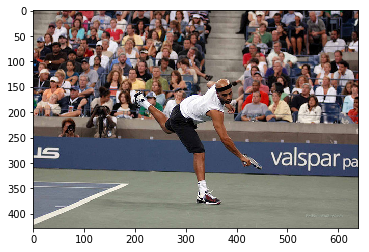

In [126]:
filenameappendix = "COCO_val2014_"
filename = filenameappendix + imgid.zfill(12) + '.jpg'
filename = os.path.join(imgdir,filename)
im = Image.open(filename)
plt.imshow(im)
plt.show()

## Change the your_question to your question

In [129]:
your_question = "What is the person doing?"

## Run to see the answer

In [130]:
label2ans_path = os.path.join('data', 'cache', 'trainval_label2ans.pkl')
ans2label = cPickle.load(open(ans2label_path, 'rb'))
label2ans = cPickle.load(open(label2ans_path, 'rb'))
eval_dset.entries[idx]['question'] = your_question
eval_dset.tokenize()
eval_dset.tensorize_newq()
v,b,q,_ = eval_dset[idx]
v = v.unsqueeze(0)
b = b.unsqueeze(0)
q = q.unsqueeze(0)
with torch.no_grad():
    v = Variable(v).cuda()
    b = Variable(b).cuda()
    q = Variable(q).cuda()
pred = model(v, b, q, None)
label2ans[int(pred.argmax().to('cpu'))]

'playing tennis'